Here's Kaggle's description

Context

The Austin Animal Center is the largest no-kill animal shelter in the United States that provides care and shelter to over 18,000 animals each year. As part of the AAC's efforts to help and care for animals in need, the organization makes available its accumulated data and statistics as part of the city of Austin's Open Data Initiative.

Content

The data contains intakes and outcomes of animals entering the Austin Animal Center from the beginning of October 2013 to the present day. The datasets are also freely available on the Socrata Open Data Access API and are updated daily.

The following are links to the datasets hosted on Socrata's Open Data:

Austin Animal Center Intakes

Austin Animal Center Outcomes

The data contained in this dataset is the outcomes and intakes data as noted above, as well as a combined dataset. The merging of the outcomes and intakes data was done on a unique key that is a combination of the given Animal ID and the intake number. Several of the animals in the dataset have been taken into the shelter multiple times, which creates duplicate Animal IDs that causes problems when merging the two datasets.

Copied from the description of the Shelter Outcomes dataset, here are some definitions of the outcome types:

Adoption

the animal was adopted to a home
Barn Adoption
the animal was adopted to live in a barn
Offsite Missing
the animal went missing for unknown reasons at an offsite partner location
In-Foster Missing
the animal is missing after being placed in a foster home
In-Kennel Missing
the animal is missing after being transferred to a kennel facility
Possible Theft
Although not confirmed, the animal went missing as a result of theft from the facility
Barn Transfer
The animal was transferred to a facility for adoption into a barn environment
SNR
SNR refers to the city of Austin's Shelter-Neuter-Release program. I believe the outcome is representative of the animal being released.
Acknowledgements
The data presented here is only possible through the hard work and dedication of the Austin Animal Center in saving and caring for animal lives.

Inspiration

Following from the first dataset I posted to Kaggle, Austin Animal Shelter Outcomes, which was initially filtered for just cats as part of an analysis I was performing, I wanted to post the complete outcome and complementing intake datasets. My hope is the great users of Kaggle will find this data interesting and want to explore shelter animal statistics further and perhaps get more involved in the animal welfare community. The analysis of this data and other shelter animal provided datasets helps uncover useful insights that have the potential to save lives directly.

In [287]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import time
import matplotlib.pyplot as plt

Animal Center Intakes from Oct, 1st 2013 to present. Intakes represent the status of animals as they arrive at the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners.

Link: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm

In [84]:
df_i = pd.read_csv('Austin_Animal_Center_Intakes.csv') #Intakes
df_i.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A794208,NaN,05/04/2019 07:20:00 PM,05/04/2019 07:20:00 PM,13021 Dessau Road in Austin (TX),Stray,Normal,Cat,Unknown,1 year,Domestic Shorthair Mix,Black
1,A794209,NaN,05/04/2019 07:20:00 PM,05/04/2019 07:20:00 PM,13021 Dessau Road in Austin (TX),Stray,Normal,Cat,Unknown,1 year,Domestic Shorthair Mix,Orange
2,A794206,NaN,05/04/2019 07:02:00 PM,05/04/2019 07:02:00 PM,4611 Mellow Hollow in Austin (TX),Stray,Normal,Dog,Intact Female,2 years,Pit Bull Mix,Chocolate/White
3,A794207,NaN,05/04/2019 06:56:00 PM,05/04/2019 06:56:00 PM,2025 East 7Th Street in Austin (TX),Stray,Normal,Cat,Unknown,1 year,Domestic Shorthair Mix,White/Lynx Point
4,A794205,Neala,05/04/2019 06:33:00 PM,05/04/2019 06:33:00 PM,5617 Victory Gallop Drive in Austin (TX),Stray,Normal,Dog,Unknown,2 years,Great Dane,Black/Gray


Animal Center Outcomes from Oct, 1st 2013 to present. Outcomes represent the status of animals as they leave the Animal Center. All animals receive a unique Animal ID during intake. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners. The Outcomes data set reflects that Austin, TX. is the largest "No Kill" city in the country... 

Link: https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238

In [80]:
df_o = pd.read_csv('Austin_Animal_Center_Outcomes.csv') #Outcomes
df_o.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A793602,NaN,05/04/2019 07:16:00 PM,05/04/2019 07:16:00 PM,04/27/2018,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,Cream
1,A794180,NaN,05/04/2019 06:27:00 PM,05/04/2019 06:27:00 PM,11/04/2018,Transfer,Partner,Other,Intact Male,5 months,Rabbit Sh Mix,White/Tricolor
2,A788078,Romeo,05/04/2019 06:25:00 PM,05/04/2019 06:25:00 PM,11/04/2007,Return to Owner,NaN,Dog,Neutered Male,11 years,Dachshund Mix,Tricolor/Black
3,A687107,Montopolis,05/04/2019 06:14:00 PM,05/04/2019 06:14:00 PM,12/01/2013,Rto-Adopt,NaN,Dog,Neutered Male,5 years,Rhod Ridgeback,Red/Brown
4,A793449,Bailey,05/04/2019 06:10:00 PM,05/04/2019 06:10:00 PM,04/25/2018,Adoption,NaN,Dog,Spayed Female,1 year,Basset Hound Mix,White/Brown


In [81]:
print(len(df_i),len(df_o))

99582 99361


Motivation: Adopting pets from animal shelters is a desirable idea to save animals' lives. I hope that more people are willing to adopt their pets from shelters. By merging and analyzing datasets containing intakes and outcomes of animals in Austin animal center from Oct 1st, 2013 to present, I will figure out which factors are influential to the likelihood and the period of adoption. Moreover, I will analyze how the adoption likelihood changes over time.

In [82]:
for i in range(len(df_o)):
    df_o['DateTime'][i] = dt.strptime(df_o['DateTime'][i], "%m/%d/%Y %H:%M:%S %p") # Convert str to datetime

In [85]:
for i in range(len(df_i)):
    df_i['DateTime'][i] = dt.strptime(df_i['DateTime'][i], "%m/%d/%Y %H:%M:%S %p") # Convert str to datetime

In [103]:
# Divide df_o into 2019-2013 data
df_o19 = df_o[df_o['DateTime']> dt(2018, 12, 31, 23, 59, 59)] # ~ 2019.05
df_o18 = df_o[(df_o['DateTime']>dt(2017, 12, 31, 23, 59, 59)) & (df_o['DateTime']< dt(2018, 12, 31, 23, 59, 59))] 
df_o17 = df_o[(df_o['DateTime']>dt(2016, 12, 31, 23, 59, 59)) & (df_o['DateTime']< dt(2017, 12, 31, 23, 59, 59))]
df_o16 = df_o[(df_o['DateTime']>dt(2015, 12, 31, 23, 59, 59)) & (df_o['DateTime']< dt(2016, 12, 31, 23, 59, 59))]
df_o15 = df_o[(df_o['DateTime']>dt(2014, 12, 31, 23, 59, 59)) & (df_o['DateTime']< dt(2015, 12, 31, 23, 59, 59))]
df_o14 = df_o[(df_o['DateTime']>dt(2013, 12, 31, 23, 59, 59)) & (df_o['DateTime']< dt(2014, 12, 31, 23, 59, 59))] 

# Divide df_o into 2019-2013 data
df_i19 = df_i[df_i['DateTime']> dt(2018, 12, 31, 23, 59, 59)] # ~ 2019.05
df_i18 = df_i[(df_i['DateTime']>dt(2017, 12, 31, 23, 59, 59)) & (df_i['DateTime']< dt(2018, 12, 31, 23, 59, 59))] 
df_i17 = df_i[(df_i['DateTime']>dt(2016, 12, 31, 23, 59, 59)) & (df_i['DateTime']< dt(2017, 12, 31, 23, 59, 59))]
df_i16 = df_i[(df_i['DateTime']>dt(2015, 12, 31, 23, 59, 59)) & (df_i['DateTime']< dt(2016, 12, 31, 23, 59, 59))]
df_i15 = df_i[(df_i['DateTime']>dt(2014, 12, 31, 23, 59, 59)) & (df_i['DateTime']< dt(2015, 12, 31, 23, 59, 59))]
df_i14 = df_i[(df_i['DateTime']>dt(2013, 12, 31, 23, 59, 59)) & (df_i['DateTime']< dt(2014, 12, 31, 23, 59, 59))] 

In [ ]:
# Drop some columns
df_i = df_i.drop(columns=['Name', 'MonthYear', 'Found Location', 'Intake Type'])

In [119]:
df_o = df_o.drop(columns=['Name', 'MonthYear', 'Date of Birth'])

In [189]:
df_io = pd.merge(df_i, df_o, how='inner', left_on='Animal ID', right_on='Animal ID')
df_io

,Animal ID,DateTime_x,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,Breed_x,Color_x,DateTime_y,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y
0,A793374,2019-05-04 05:00:00,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White,2019-04-28 09:50:00,Adoption,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White
1,A793374,2019-04-24 11:01:00,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White,2019-04-28 09:50:00,Adoption,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White
2,A623261,2019-05-04 04:33:00,Normal,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White,2019-03-31 04:10:00,Adoption,NaN,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White
3,A623261,2019-02-22 12:35:00,Normal,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White,2019-03-31 04:10:00,Adoption,NaN,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White
4,A790784,2019-05-04 04:25:00,Normal,Dog,Spayed Female,1 year,Keeshond Mix,Black/Brown,2019-03-21 07:03:00,Adoption,NaN,Dog,Spayed Female,1 year,Keeshond Mix,Black/Brown
5,A790784,2019-03-16 01:27:00,Normal,Dog,Intact Female,1 year,Keeshond Mix,Black/Brown,2019-03-21 07:03:00,Adoption,NaN,Dog,Spayed Female,1 year,Keeshond Mix,Black/Brown
6,A794184,2019-05-04 04:13:00,Normal,Dog,Unknown,0 years,Pit Bull Mix,White,2019-05-04 05:41:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,White
7,A794186,2019-05-04 04:13:00,Normal,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,2019-05-04 05:42:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White
8,A794188,2019-05-04 04:13:00,Normal,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,2019-05-04 05:41:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White
9,A794191,2019-05-04 04:13:00,Normal,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,2019-05-04 05:42:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White


Some animals come back to the center several times, so IDs are duplicated. Need to get rid of them.

In [190]:
df_io['Period']= df_io['DateTime_y'] - df_io['DateTime_x']

In [191]:
idx = df_io.groupby(['Animal ID'])['Period'].transform(max) == df_io['Period'] # indices survive only if period is max for ID

In [192]:
df_io = df_io[idx]

In [179]:
pd.Series(df_io['Animal ID']).is_unique

False

In [282]:
df_io = df_io.drop(columns=['Breed_x','Color_x', 'Animal Type_x'])

KeyError: "labels ['Breed_x' 'Color_x' 'Animal Type_x'] not contained in axis"

Find an average period until adoption for each animals.

In [283]:
P_animal = df_io.groupby(['Animal Type_y'])['Period'].mean(numeric_only=False)


In [284]:
P_animal.astype('timedelta64[D]') #Data converted to total days (dtype:float64)

Animal Type_y
Bird          8.0
Cat          30.0
Dog          54.0
Livestock    73.0
Other         4.0
Name: Period, dtype: float64

Text(0.5,1,'Period until Adoption')

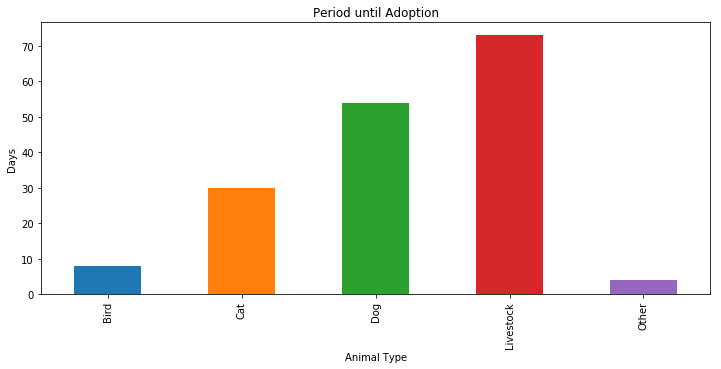

In [299]:
plt.figure(figsize=(12,5))

P_animal.astype('timedelta64[D]').plot(kind = 'bar')
plt.xlabel('Animal Type')
plt.ylabel('Days')
#plt.xticks(np.arange(5), ('Bird', 'Cat', 'Dog', 'Livestock', 'Other'))
plt.title('Period until Adoption')

Show whether breed of cats or dogs effects on the period until adoption.

In [302]:
df_cat = df_io[df_io['Animal Type_y'] == 'Cat']
df_cat

,Animal ID,DateTime_x,Intake Condition,Sex upon Intake,Age upon Intake,DateTime_y,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y,Period
24,A756291,2017-08-17 11:45:00,Normal,Intact Female,1 month,2017-08-22 12:30:00,Transfer,Partner,Cat,Intact Female,2 months,Domestic Shorthair Mix,Brown Tabby,5 days 00:45:00
36,A794141,2019-05-04 12:20:00,Normal,Unknown,2 days,2019-05-04 01:00:00,Transfer,Partner,Cat,Unknown,2 days,Domestic Shorthair Mix,Blue,-1 days +12:40:00
37,A794140,2019-05-04 12:20:00,Normal,Unknown,2 days,2019-05-04 01:00:00,Transfer,Partner,Cat,Unknown,2 days,Domestic Shorthair Mix,Black,-1 days +12:40:00
38,A794139,2019-05-04 12:20:00,Normal,Unknown,2 days,2019-05-04 01:00:00,Transfer,Partner,Cat,Unknown,2 days,Domestic Shorthair Mix,Black,-1 days +12:40:00
39,A794138,2019-05-04 12:18:00,Normal,Unknown,3 days,2019-05-04 12:59:00,Transfer,Partner,Cat,Unknown,3 days,Domestic Shorthair,Black,0 days 00:41:00
130,A794117,2019-05-04 11:37:00,Normal,Unknown,2 weeks,2019-05-04 01:03:00,Transfer,Partner,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Brown Tabby,-1 days +13:26:00
131,A794118,2019-05-04 11:37:00,Normal,Unknown,2 weeks,2019-05-04 01:03:00,Transfer,Partner,Cat,Unknown,2 weeks,Domestic Shorthair Mix,White/Blue Tabby,-1 days +13:26:00
132,A794116,2019-05-04 11:37:00,Normal,Unknown,2 weeks,2019-05-04 01:02:00,Transfer,Partner,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Brown Tabby,-1 days +13:25:00
133,A794119,2019-05-04 11:37:00,Normal,Unknown,2 weeks,2019-05-04 01:03:00,Transfer,Partner,Cat,Unknown,2 weeks,Domestic Shorthair Mix,White/Brown Tabby,-1 days +13:26:00
134,A794120,2019-05-04 11:37:00,Normal,Unknown,2 weeks,2019-05-04 01:03:00,Transfer,Partner,Cat,Unknown,2 weeks,Domestic Shorthair Mix,Black/White,-1 days +13:26:00


In [303]:
df_dog = df_io[df_io['Animal Type_y'] == 'Dog']
df_dog

,Animal ID,DateTime_x,Intake Condition,Sex upon Intake,Age upon Intake,DateTime_y,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y,Period
1,A793374,2019-04-24 11:01:00,Normal,Spayed Female,2 years,2019-04-28 09:50:00,Adoption,NaN,Dog,Spayed Female,2 years,Chihuahua Shorthair Mix,White,3 days 22:49:00
3,A623261,2019-02-22 12:35:00,Normal,Spayed Female,9 years,2019-03-31 04:10:00,Adoption,NaN,Dog,Spayed Female,9 years,Pit Bull Mix,Black/White,36 days 15:35:00
5,A790784,2019-03-16 01:27:00,Normal,Intact Female,1 year,2019-03-21 07:03:00,Adoption,NaN,Dog,Spayed Female,1 year,Keeshond Mix,Black/Brown,5 days 05:36:00
6,A794184,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:41:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,White,0 days 01:28:00
7,A794186,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:42:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,0 days 01:29:00
8,A794188,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:41:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,0 days 01:28:00
9,A794191,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:42:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,0 days 01:29:00
10,A794187,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:41:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,Brown/White,0 days 01:28:00
11,A794190,2019-05-04 04:13:00,Normal,Unknown,0 years,2019-05-04 05:41:00,Transfer,Partner,Dog,Unknown,0 years,Pit Bull Mix,White/Brown,0 days 01:28:00
14,A788078,2019-01-25 07:03:00,Normal,Neutered Male,11 years,2019-05-04 06:25:00,Return to Owner,NaN,Dog,Neutered Male,11 years,Dachshund Mix,Tricolor/Black,98 days 23:22:00


In [319]:
df_cat_m = df_cat[df_cat['Breed_y'].str.contains('Mix')] #Mix cats

df_cat_mn = df_cat[~df_cat['Breed_y'].str.contains('Mix')] #Non-mix cats

In [326]:
P_cat_m = df_cat_m['Period'].mean(numeric_only=False)
P_cat_m

Timedelta('30 days 02:52:04.569312')

In [324]:
P_cat_mn = df_cat_mn['Period'].mean(numeric_only=False)
P_cat_mn

Timedelta('33 days 22:26:32.112676')

In [327]:
df_dog_m = df_dog[df_dog['Breed_y'].str.contains('Mix')] #Mix dogs

In [330]:
df_dog_mn = df_dog[~df_dog['Breed_y'].str.contains('Mix')] #Mix dogs

In [331]:
P_dog_m = df_dog_m['Period'].mean(numeric_only=False)
P_dog_m

Timedelta('53 days 06:31:56.980121')

In [332]:
P_dog_mn = df_dog_mn['Period'].mean(numeric_only=False)
P_dog_mn

Timedelta('56 days 16:37:47.191256')

Show whether cats or dogs' ages effect on period until adoption.

Show whether Neutralization surgery effect on period until adoption.

In [341]:
df_cat_s = df_cat[~df_cat['Sex upon Outcome'].str.contains('Intact')] #neutered, spayed cats

df_cat_ns = df_cat[df_cat['Sex upon Outcome'].str.contains('Intact')] #Intact cats

In [342]:
P_cat_s = df_cat_s['Period'].mean(numeric_only=False)
P_cat_s

Timedelta('42 days 01:00:07.393646')

In [343]:
P_cat_ns = df_cat_ns['Period'].mean(numeric_only=False)
P_cat_ns

Timedelta('6 days 03:56:00.757164')

In [350]:
df_dog_s = df_dog[~df_dog['Sex upon Outcome'].str.contains('Intact', na=False)] #neutered, spayed dogs

df_dog_ns = df_dog[df_dog['Sex upon Outcome'].str.contains('Intact', na=False)] #Intact dogs

In [352]:
P_dog_s = df_dog_s['Period'].mean(numeric_only=False)
P_dog_s

Timedelta('64 days 06:23:20.703749')

In [353]:
P_dog_ns = df_dog_ns['Period'].mean(numeric_only=False)
P_dog_ns

Timedelta('18 days 08:53:50.692660')

In [360]:
data = np.array([42, 6, 64, 18])
S = pd.Series(data, index=['Neuterd, Spayed cat', 'Intact cat', 'Neutered, Spayed dog', 'Intact dog'])

Text(0.5,1,'Period until Adoption')

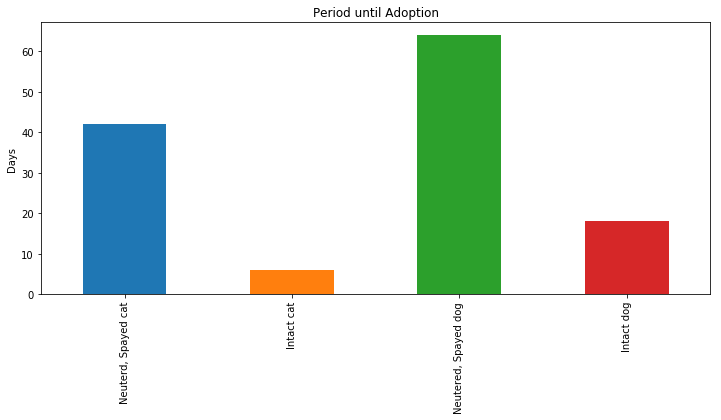

In [362]:
plt.figure(figsize=(12,5))

S.plot(kind = 'bar')
plt.ylabel('Days')
plt.title('Period until Adoption')